# Mini Demo


In [19]:
import importlib
import utils
import mypytable
importlib.reload(mypytable)
from mypytable import MyPyTable
import myknnclassifier

mush_data = MyPyTable()
mush_data.load_from_file('/home/CPSC322finalProject/new_mushroom_cleaned.csv')

In [20]:
# train test split and data set shrink
indexes_to_remove = utils.rand_inds(45000, 54034)
mush_data.drop_rows(indexes_to_remove)


#print(len(mush_data.data))

df_mush = []
for i, row in enumerate(mush_data.data):
    df_mush.append(row)

#print(len(df_mush))


season = [row[7] for row in df_mush]
stem_width = [row[5] for row in df_mush]
gill_color = [row[3] for row in df_mush]
cap_diameter = [row[0] for row in df_mush]

yummy_or_nah = [row[8] for row in df_mush]

# normalize the data
season_norm = utils.normalize_data(season)
stem_width_norm = utils.normalize_data(stem_width)
gill_color_norm = utils.normalize_data(gill_color)
cap_diameter_norm = utils.normalize_data(cap_diameter)

data_zipped = list(zip(season_norm, stem_width_norm, gill_color_norm, cap_diameter_norm))
X_data = data_zipped

X_train, X_test, y_train, y_test = utils.train_test_split(X_data, yummy_or_nah, test_size=0.33, random_state=1, shuffle=True)
print(len(y_test))
print(len(X_test))
print(len(X_train))
print(len(y_train))

2982
2982
6053
6053


## KNN MUSHROOMS!

In [21]:
# initiate the knn
knn = myknnclassifier.MyKNeighborsClassifier(n_neighbors= 5)

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

x values: [1.0, 2.0, 3.0, 4.0] y values: [393, 3304, 4554, 784]


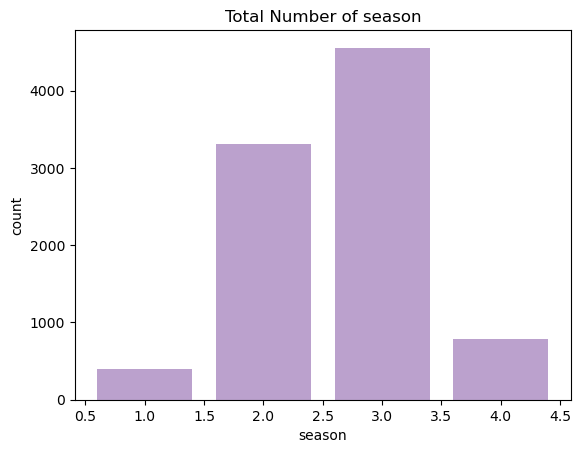

x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] y values: [927, 282, 2114, 412, 300, 1073, 3927]


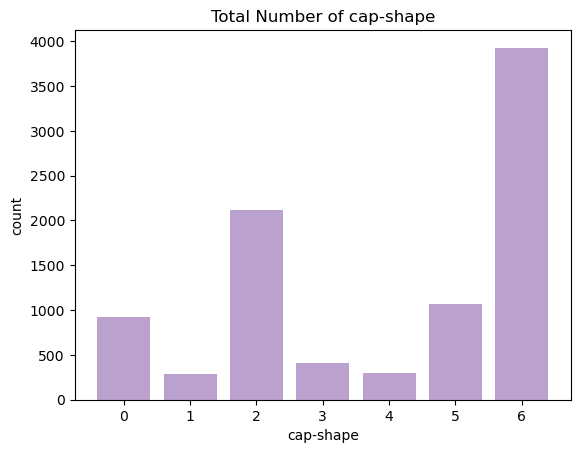

x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] y values: [3250, 1624, 743, 470, 795, 899, 1254]


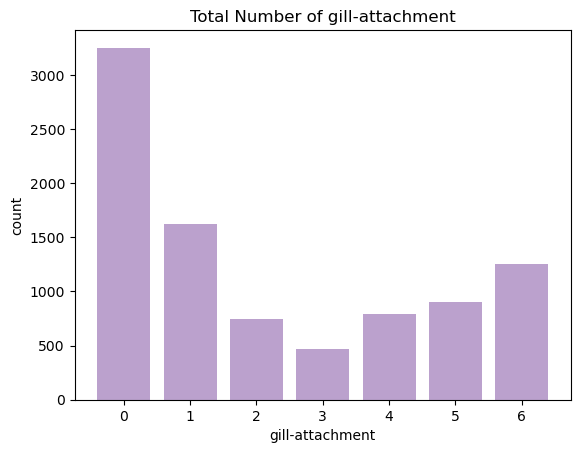

x values: [0.0, 1.0] y values: [4143, 4892]


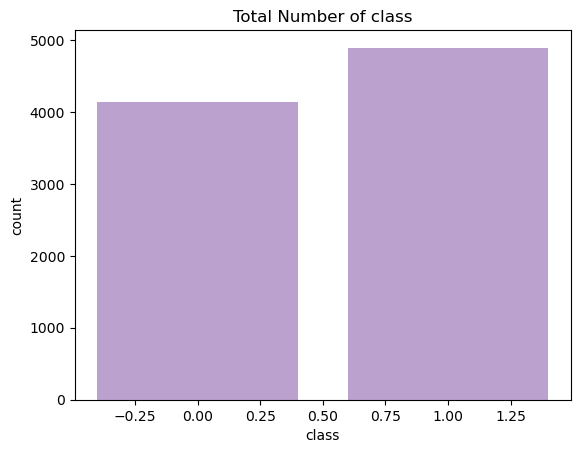

In [22]:
utils.freq_plot(mush_data.data, mush_data.column_names, "season", )
utils.freq_plot(mush_data.data, mush_data.column_names, "cap-shape")
utils.freq_plot(mush_data.data, mush_data.column_names, "gill-attachment")
utils.freq_plot(mush_data.data, mush_data.column_names, "class")

## *cut down do that 0 and 1 are equal and roughly 1000*


Legend:
* season (n): winter=1, spring=2, summer=3, autumn=4
* cap-shape (n): bell=0, conical=1, convex=2, flat=3, sunken=4, spherical=5, others=6
* gill-attachment (n): adnate=0, adnexed=1, decurrent=2, free=3, sinuate=4, pores=5, none=6


For our class labels: 
* O is no, not edible
* 1 is yes, is edible

In [23]:
acc = utils.compute_accuracy(knn_y_pred, y_test)
print(f'Accuacy: {acc:.4f}')

recall = utils.compute_recall(knn_y_pred, y_test, positive_label=1)
print(f'Recall: {recall:.4f}')

Accuacy: 0.8273
Recall: 0.8357
